In [1]:
%cd ./drive/MyDrive/heart_segmentation-master

/content/drive/MyDrive/heart_segmentation-master


In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from unet import unet_reduzida, unet_completa, unet_n, dice_coef
from utils import get_images, separate_train_test, make_vol, image_preprocess

Using TensorFlow backend.


In [5]:
import glob
from keras import backend as K
import numpy as np
import tensorflow as tf
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from time import time

hd = [45 , 25, 40 , 40 , 13, 40, 42 , 33, 6 , 43 , 37 , 8 , 28, 18, 46 , 37, 41 , 41 , 33, 33 ]
hu = [112, 95, 113, 116, 91, 98, 109, 98, 67, 105, 104, 81, 97, 88, 103, 90, 110, 113, 92, 101]

x_train = sorted(glob.glob('data_heart/imagesTr/*'))
y_train = sorted(glob.glob('data_heart/labelsTr/*'))
img_xtrain, index_x = get_images(x_train,hd,hu)
img_ytrain, index_y = get_images(y_train,hd,hu)

#predict_vol = []
dice_metric = []
tempo = []
local = 'leaveoneout_reduz/'

i = 1

In [6]:
train_X, valid_X, index_train_x, index_test_x = separate_train_test(img_xtrain, index = i)
train_ground, valid_ground, index_train_y, index_test_y = separate_train_test(img_ytrain, index = i)

In [7]:
print(len(train_X))
print(len(train_ground))

1264
1264


In [8]:
size_img = 128
train_X, valid_X, train_ground, valid_ground = image_preprocess(train_X, valid_X, train_ground, valid_ground)

In [ ]:
model = unet_n(size_img, mult = 1)
red = ReduceLROnPlateau(monitor = 'loss', patience = 2, verbose = 1)
es = EarlyStopping(monitor = 'loss', patience = 5, verbose = 1)

history = model.fit(x = train_X, y = train_ground, batch_size = 8, epochs = 50, callbacks = [red, es])

/content/drive/MyDrive/heart_segmentation-master/unet.py:203: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)



Epoch 1/50
1264/1264 [==============================] - 689s 545ms/step - loss: 0.2415
Epoch 2/50
1264/1264 [==============================] - 684s 541ms/step - loss: 0.0508
Epoch 3/50
1264/1264 [==============================] - 685s 542ms/step - loss: 0.0370
Epoch 4/50
1264/1264 [==============================] - 690s 546ms/step - loss: 0.0308
Epoch 5/50
1264/1264 [==============================] - 695s 550ms/step - loss: 0.0269
Epoch 6/50
 272/1264 [=====>........................] - ETA: 9:13 - loss: 0.0232

In [ ]:
predicao = model.predict(valid_X)
predicao = predicao > 0.5
predicao = np.float64(predicao)

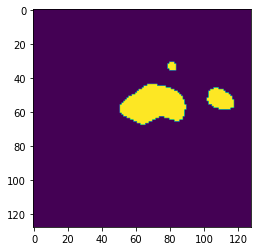

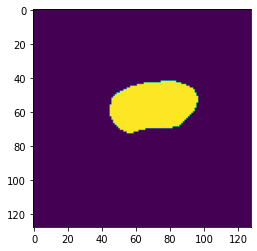

In [ ]:
plt.imshow(np.reshape(valid_ground[10], (128, 128)))
plt.savefig('valid1.png')
plt.show()

plt.imshow(np.reshape(valid_ground[35], (128, 128)))
plt.savefig('valid2.png')
plt.show()

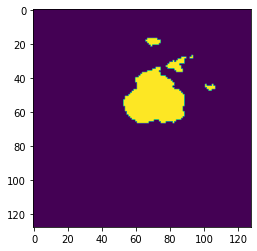

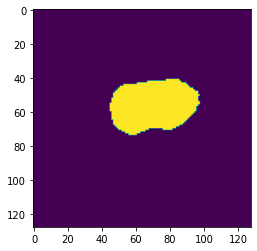

In [ ]:
plt.imshow(np.reshape(predicao[10], (128, 128)))
plt.savefig('predict1.png')
plt.show()

plt.imshow(np.reshape(predicao[35], (128, 128)))
plt.savefig('predict2.png')
plt.show()

In [11]:
_train = np.reshape(train_X[30], (128, 128))
_mask = np.reshape(train_ground[30], (128, 128))

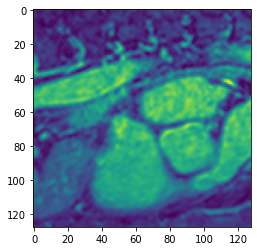

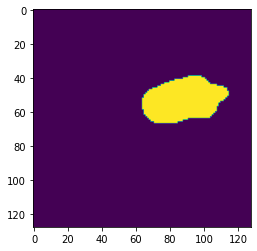

In [12]:
plt.imshow(_train)
plt.savefig('train.png')
plt.show()
plt.imshow(_mask)
plt.savefig('mask.png')
plt.show()